# Credit Risk Analysis

### Problem Statement
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


### Variable information

|**Variable**|**Description**|
|:---:  | :---: |
<br>Loan_ID	                  | Unique Loan ID
<br>Gender    	              | Male/ Female
<br>MarriedApplicant          | married (Y/N)
<br>Dependents	              | Number of dependents
<br>Education                 | (Graduate/ Under Graduate)
<br>Self_Employed	          | Self employed (Y/N)
<br>ApplicantIncome	          | Applicant income
<br>CoapplicantIncome	      | Coapplicant income
<br>LoanAmount	              | Loan amount in thousands
<br>Loan_Amount_Term	      | Term of loan in months
<br>Credit_History	          | credit history meets guidelines
<br>Property_Area	          | Urban/ Semi Urban/ Rural
<br>Loan_Status	              | Loan approved (Y/N)




In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

%matplotlib inline 
import warnings                                               # lets ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
import os
print(os.listdir("./credit risk"))

['.ipynb_checkpoints', 'test_data', 'train_data', 'val_data']


In [3]:
# Data import
train=pd.read_csv("./credit risk/train_data")
test=pd.read_csv('./credit risk/test_data')
validate=pd.read_csv('./credit risk/val_data')

# lets make a copy of the dataset for our conviniance
train_original=train.copy()
test_original=test.copy()
validate_original=validate.copy()


In [4]:
# Data check
#train.head()
#test.head()

In [5]:
# shape of each dataset                                                                        
print("train:",train.shape)
print("test:",test.shape)
print("validate",validate.shape)

train: (614, 13)
test: (367, 12)
validate (367, 13)


In [6]:
# Datatypes of each variable
#so some are catagorical variables like gender,married,education and some are continuous like income ,loan amount etc
#train.dtypes

In [7]:
# lets first drop na 
train_data=train.dropna()
train_data.shape

(480, 13)

##  Exploratory data analysis

Text(0,0.5,'Loan status')

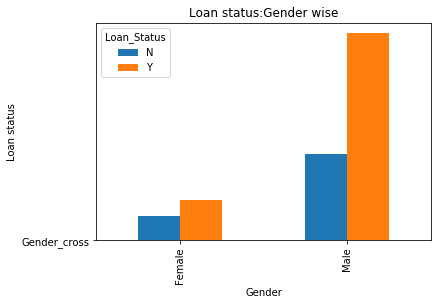

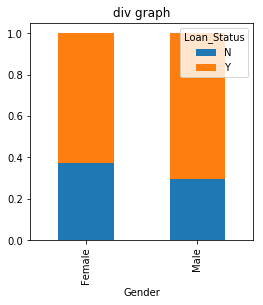

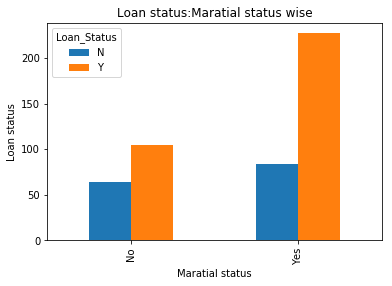

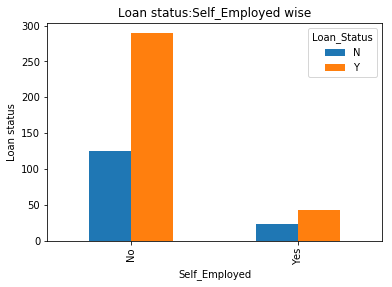

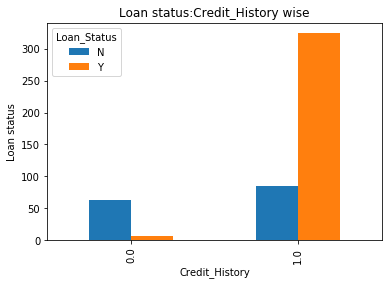

In [8]:


# frst lets visulize the catagorical varibles

# 1.Gender
# most of the candidates in dataset are male and loan is approved 
Gender=pd.crosstab(train_data.Gender,train_data.Loan_Status)
pd.crosstab(train_data.Gender,train_data.Loan_Status).plot(kind="bar")
plt.plot("Gender_cross")
plt.title('Loan status:Gender wise')
plt.xlabel('Gender')
plt.ylabel('Loan status')

# from divident graph the prop of male and female for both approval and not approval of loan is nearly same
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4),title="div graph")


#Marrital status
# most of the candidates are married and loan is approved to them
pd.crosstab(train_data.Married,train_data.Loan_Status).plot(kind="bar")
plt.title('Loan status:Maratial status wise')
plt.xlabel('Maratial status')
plt.ylabel('Loan status')

# very few candidates in our datasets are not self employed and proportion of loan approval is high
pd.crosstab(train_data.Self_Employed,train_data.Loan_Status).plot(kind="bar")
plt.title('Loan status:Self_Employed wise')
plt.xlabel('Self_Employed')
plt.ylabel('Loan status')

# credit history
# most of the candidates repaied their debets and yes loan is approved for them
pd.crosstab(train_data.Credit_History,train_data.Loan_Status).plot(kind="bar")
plt.title('Loan status:Credit_History wise')
plt.xlabel('Credit_History')
plt.ylabel('Loan status')





Text(0,0.5,'Loan status')

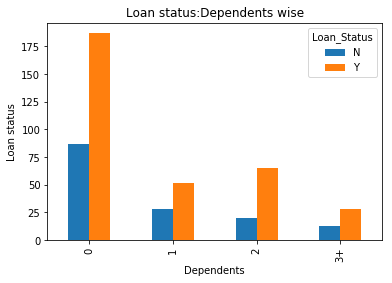

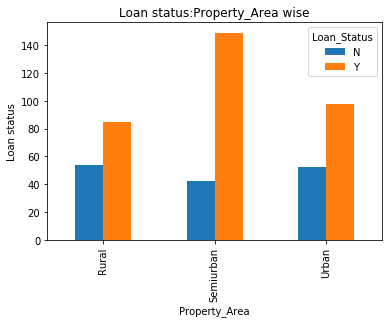

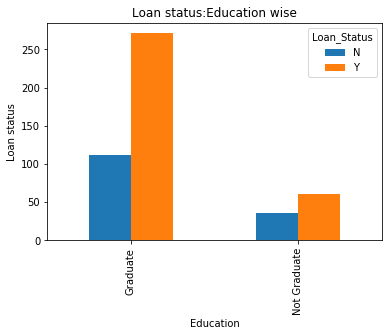

In [9]:
# EDA
# dependents
# most candidates dont have dependents and mostly for these catagory of dependents loan is approved 
pd.crosstab(train_data.Dependents,train_data.Loan_Status).plot(kind="bar")
plt.title('Loan status:Dependents wise')
plt.xlabel('Dependents')
plt.ylabel('Loan status')


# Property area
# most candidates are from semi urban area and the prop of laon approval is higher for them
pd.crosstab(train_data.Property_Area,train_data.Loan_Status).plot(kind="bar")
plt.title('Loan status:Property_Area wise')
plt.xlabel('Property_Area')
plt.ylabel('Loan status')


# education
# most cndidates are graduate and the approval of loan is more for graduate candiadates 
pd.crosstab(train_data.Education,train_data.Loan_Status).plot(kind="bar")
plt.title('Loan status:Education wise')
plt.xlabel('Education')
plt.ylabel('Loan status')

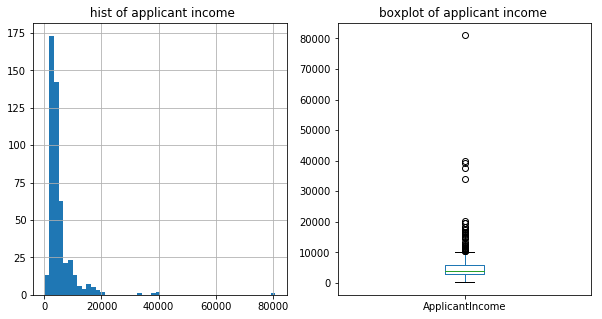

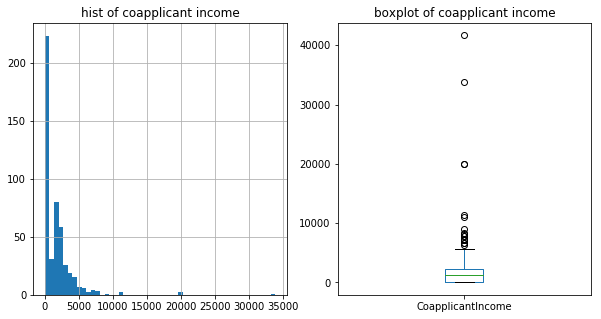

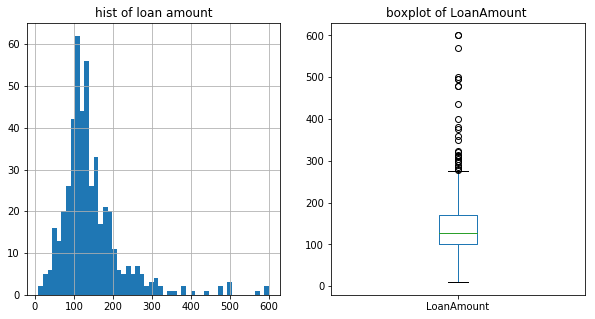

In [10]:
# visulization of continuous variables

# 1. Applicant income
# the dist of applicant income and coapplicant income is right skewd that is some extrme points on right side 
# the boxplot clearly shows the otliers which we need to take care of
plt.figure(1)
plt.subplot(121)
train_data.ApplicantIncome.hist(bins=50)
#plt.hist(train_data['ApplicantIncome']);
plt.title(" hist of applicant income")

plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(10,5))
plt.title("boxplot of applicant income ")
plt.show()


# coapplicant income
plt.figure(2)
plt.subplot(121)
train_data.CoapplicantIncome.hist(bins=50)
plt.title("hist of coapplicant income")

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(10,5))
plt.title("boxplot of coapplicant income")
plt.show()


# 2.Loan amount
#loan amount dist is nealry normal and outliers are also normally distributed
plt.figure(3)
plt.subplot(121)
train_data.LoanAmount.hist(bins=50)
plt.title("hist of loan amount")

plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize=(10,5))
plt.title("boxplot of LoanAmount ")
plt.show()





In [11]:
# Continuous varibles with loan status
# loan approval is higher where applicant income is low
# loan approval rate is high where coapplicant income is low
 # loan approval is higher for low loan amount
train_data.groupby("Loan_Status").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5730.189189,1773.081081,153.378378,342.810811,0.574324
Y,5201.093373,1495.508795,140.882530,341.710843,0.978916


## Data Cleaning

In [12]:

# lets have a look over response variable i.e loan status 
# Which category of the target lebel is how many percentage.
length=len(train["Loan_Status"]) # 614
percentage=(train["Loan_Status"].value_counts()/length)*100
print(percentage)

# we can either check the count of each catagory of loan status
print(train["Loan_Status"].value_counts())   # is i set normalize is true then it will return the proportion


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64
Y    422
N    192
Name: Loan_Status, dtype: int64


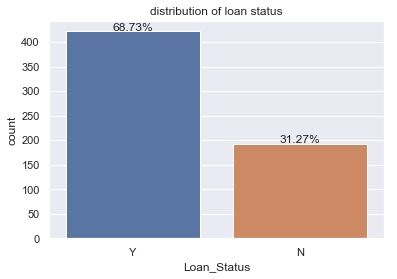

In [13]:
# graphical view by percentage
sns.set()
sns.countplot(train["Loan_Status"]).set_title("distribution of loan status")
ax=plt.gca()  # gets the current axces 
for p in ax.patches : # for loop will alwz start with colon 
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+2,"{:.2f}%".format(100*(height/length)),ha="center")


In [14]:
# we can clearly see the missing values here 
#train.info()
# count of missing values
#train.isnull().sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

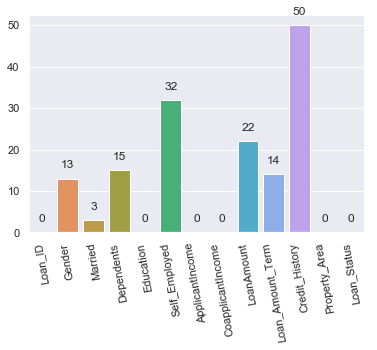

In [15]:
# we can plot the missing values count
x=train.columns
y=train.isnull().sum()
ax=sns.barplot(x,y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 ,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')
plt.xticks(rotation=100)

In [16]:
# lets first impute the catogorical variables with mode
train["Gender"].value_counts() #  will get our mode male in this case  
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)  # train.Gender.unique()
train["Married"].fillna(train["Married"].mode()[0],inplace=True) #train.Married.unique()
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True) #train.Self_Employed.unique()
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True) #train.Dependents.unique()
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True) #train.Credit_History.unique()

In [17]:
# lets check for loan amount term
train["Loan_Amount_Term"] .dtype  # this is continuous bt will treat it as ordinal 
train["Loan_Amount_Term"].head()  
train["Loan_Amount_Term"].value_counts()   # 360 is coming out to be mode
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)


In [18]:
# will check for loan amount 
# dist is right skewd so better to impute with median 
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)


In [19]:
# missing value imputation for test
#test.isnull().sum()

test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)  # train.Gender.unique()
#train["Married"].fillna(train["Married"].mode()[0],inplace=True) #train.Married.unique()
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True) #train.Self_Employed.unique()
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True) #train.Dependents.unique()
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True) #train.Credit_History.unique()
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)


In [20]:
validate.shape
validate.isnull().sum()

# missing value imputatin for validate data
validate["Gender"].fillna(validate["Gender"].mode()[0],inplace=True)  # train.Gender.unique()
#train["Married"].fillna(train["Married"].mode()[0],inplace=True) #train.Married.unique()
validate["Self_Employed"].fillna(validate["Self_Employed"].mode()[0],inplace=True) #train.Self_Employed.unique()
validate["Dependents"].fillna(validate["Dependents"].mode()[0],inplace=True) #train.Dependents.unique()
validate["Credit_History"].fillna(validate["Credit_History"].mode()[0],inplace=True) #train.Credit_History.unique()
validate["Loan_Amount_Term"].fillna(validate["Loan_Amount_Term"].mode()[0],inplace=True)
validate["LoanAmount"].fillna(validate["LoanAmount"].median(),inplace=True)


In [21]:
## outlier detection 
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# 1.applicant income and coapplicant income has outliers from boxplot also
# loan amount also has outliers but are normally dist




ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [22]:
# treat outliers

#1. applicant income 
#sns.distplot(train["ApplicantIncome"])                       # right skewed
#train["ApplicantIncome_log"]=np.log(train["ApplicantIncome"])  # log transform
#sns.distplot(train["ApplicantIncome_log"])                     # normallly dist

# 3.loan amount
#train["LoanAmount_log"]=np.log(train["LoanAmount" ])        # log transform
#sns.distplot(train["LoanAmount_log"])                       # normally dist

#Q1 = train.quantile(0.25)
#Q3 = train.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)


In [23]:
# Data preparation
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)
validate=validate.drop('Loan_ID',axis=1)

In [24]:
# lets code loan status as 0 1nd 1
# and 3+ in dependence as 3
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
validate['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace(("Y","N"),(1,0),inplace=True)
validate['outcome'].replace(("Y","N"),(1,0),inplace=True)


In [25]:
# corrrealtion between variables
# lets get correlation matrix 
cormat=train.corr()
print(cormat)


                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565181   
CoapplicantIncome        -0.116605           1.000000    0.189218   
LoanAmount                0.565181           0.189218    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036960   
Credit_History           -0.018615           0.011134   -0.000607   
Loan_Status              -0.004710          -0.059187   -0.033214   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.046531       -0.018615    -0.004710  
CoapplicantIncome         -0.059383        0.011134    -0.059187  
LoanAmount                 0.036960       -0.000607    -0.033214  
Loan_Amount_Term           1.000000       -0.004705    -0.022549  
Credit_History            -0.004705        1.000000     0.540556  
Loan_Status               -0.022549        0.540556     1.000000  


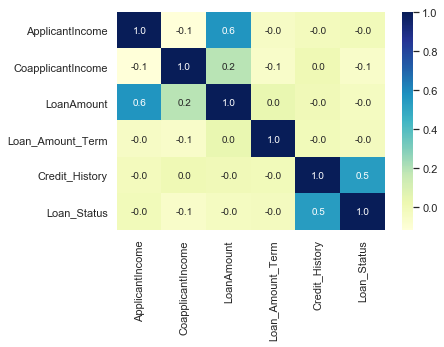

In [26]:
sns.set()
sns.heatmap(cormat,annot=True,fmt=".1f",
            cmap="YlGnBu",annot_kws={"size":10})
plt.show()

# results: loan amount and applicant income are correlated 
#          credit history and loan status are correlated
#          somhow coapplicant and loan amount 

# Model Building

In [27]:
## Data preparation for model building 
x = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [28]:
X=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size =0.4)

In [31]:
# we can check the model 
#import statsmodels.api as sm
#log_model=sm.Logit(y_train,x_train)
#result=log_model.fit()
#result
#result.summary()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
pred_val=log_model.predict(x_val)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(log_model.score(x_val, y_val)))

Accuracy of logistic regression classifier on validation set: 0.80


In [35]:
log_score=accuracy_score(pred_val,y_val)
log_score

0.8048780487804879

In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_val,pred_val)
confusion_matrix

array([[ 38,  43],
       [  5, 160]], dtype=int64)

In [37]:
#Compute precision, recall, F-measure and support
# f1 score tells us the accuracy of classifier classifying the data points in that particular class compared to other class
# here approval of loan is correctly clissifying 87%

from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

             precision    recall  f1-score   support

          0       0.88      0.47      0.61        81
          1       0.79      0.97      0.87       165

avg / total       0.82      0.80      0.79       246



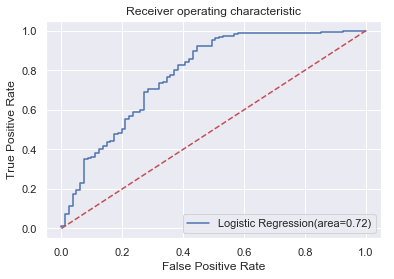

In [38]:
# ROC curve for logistic regression model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc=roc_auc_score(y_val, pred_val)
fpr,tpr,threshholds=roc_curve(y_val,log_model.predict_proba(x_val)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'%log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


avg_precision_recall score is:0.7846183813383141


Text(0.5,1,'2-class Precision-Recall curve: AP=0.78')

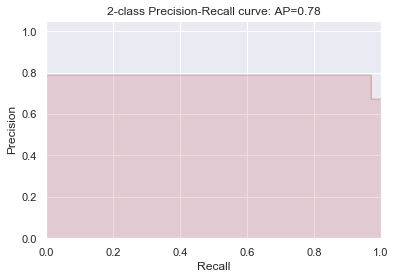

In [39]:
# precision recall curve 
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt
avg_precision=average_precision_score(y_val, pred_val)
print("avg_precision_recall score is:{}".format(avg_precision))


precision, recall, _ = precision_recall_curve(y_val, pred_val)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          avg_precision))

In [40]:
## to make model more robust over test dataset
## cross validated model
# we get better acurracy than logistic model
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf=KFold(n_splits=10,random_state=0)
log_CV_model=LogisticRegression()
scoring="accuracy"
result=model_selection.cross_val_score(log_CV_model,x_train,y_train,cv=kf,scoring=scoring)
print(result)
print("10-fold cross validation average accuracy: %.3f" % (result.mean()))


[0.72972973 0.86486486 0.83783784 0.72972973 0.86486486 0.83783784
 0.86486486 0.67567568 0.80555556 0.83333333]
10-fold cross validation average accuracy: 0.804


In [41]:
## to make model more robust over test dataset
## repeated cross validated model
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
rep_kf=RepeatedKFold(n_splits=10,n_repeats=5,random_state=0)

log_CV_model=LogisticRegression()
scoring="accuracy"
result=model_selection.cross_val_score(log_CV_model,x_train,y_train,cv=rep_kf,scoring=scoring)
print(result)
CV_score=result.mean()
print("10-fold cross validation average accuracy: %.3f" % (result.mean()))


[0.78378378 0.83783784 0.89189189 0.89189189 0.72972973 0.89189189
 0.7027027  0.64864865 0.88888889 0.83333333 0.78378378 0.75675676
 0.86486486 0.86486486 0.83783784 0.81081081 0.81081081 0.83783784
 0.72222222 0.75       0.94594595 0.89189189 0.83783784 0.86486486
 0.7027027  0.81081081 0.86486486 0.7027027  0.77777778 0.75
 0.83783784 0.89189189 0.78378378 0.89189189 0.75675676 0.83783784
 0.7027027  0.81081081 0.80555556 0.75       0.91891892 0.78378378
 0.78378378 0.83783784 0.7027027  0.86486486 0.75675676 0.81081081
 0.77777778 0.83333333]
10-fold cross validation average accuracy: 0.809


In [42]:
# stratified K FOld 
from sklearn.model_selection import StratifiedKFold
i=1
avg=0
str_kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in str_kf.split(X,y):
    print('\n{} of kfold {}'.format(i,str_kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    str_model = LogisticRegression()
    str_model.fit(xtr, ytr)
    pred_test = str_model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    avg=avg+score
    print('accuracy_score',score)
    i+=1
# average accuracy by staratified k fold.mean
log_avg_accuracy = avg/5
print('\n average accuracy for stritified kFold=',log_avg_accuracy)

pred=str_model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164

 average accuracy for stritified kFold= 0.8126916975145425


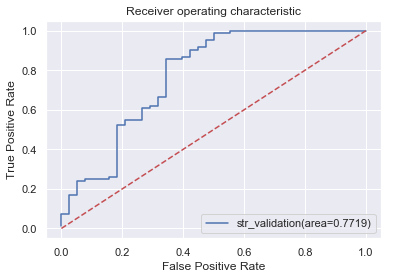

In [43]:
# ROC curve for strtified KFOLD cross validated model

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
str_roc_auc=roc_auc_score(yvl, pred)
fpr,tpr,threshholds=roc_curve(yvl,str_model.predict_proba(xvl)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='str_validation(area=%0.4f)'%str_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('str_ROC')
plt.show()



avg_precision_recall score is:0.8509289095808893


Text(0.5,1,'2-class Precision-Recall curve: AP=0.85')

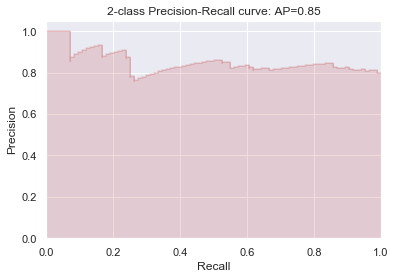

In [44]:
##  either way precision_recall_curve 
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt
avg_precision=average_precision_score(yvl, pred)
print("avg_precision_recall score is:{}".format(avg_precision))
precision, recall, _ = precision_recall_curve(yvl, pred)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          avg_precision))

In [45]:
# final predictions on test data
#pred_test = str_model.predict(test)  # will predict by stratified k fold cross validated model for test data



In [46]:
#submission=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_pred":pred_test})
#submission.head()

In [47]:
# lets convert 0 and 1 to Y/N
#submission['Loan_pred'].replace(0, 'N',inplace=True)
#submission['Loan_pred'].replace(1, 'Y',inplace=True)

In [48]:
#submission.head()

In [49]:
#submission['Loan_pred'].value_counts()

In [50]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook

#file="LOan_status_test_pred.csv"
#submission.to_csv(file,index=False)
#print('Saved file: ' + file)

In [51]:
## svc dosnt seems good model for this data 


In [52]:
# lets build decision tree 
from sklearn import tree
from sklearn import cross_validation

In [53]:
tree_model=tree.DecisionTreeClassifier(max_depth=10)

In [54]:
tree_model.fit(x_train,y_train)
DT_score=tree_model.score(x_val,y_val)   
print("Accuracy of Decision tree classifier on validation set:{:.2f} , which is low".format(tree_model.score(x_val,y_val)))  

Accuracy of Decision tree classifier on validation set:0.74 , which is low


In [55]:
## Using shuffle to select records randomply
#shuffle_validator=cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
#def test_classifier(clf): 
#scores=cross_validation.cross_val_score(X,y,cv=shuffle_validator)
# print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))
# test_classifier(clf_dt)


## error 

In [56]:
# stratified K FOld 
from sklearn.model_selection import StratifiedKFold
i=1
avg=0
str_kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in str_kf.split(X,y):
    print('\n{} of kfold {}'.format(i,str_kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    DT_str_model = tree.DecisionTreeClassifier(random_state=1)
    DT_str_model.fit(xtr, ytr)
    pred_test = DT_str_model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    avg=avg+score
    print('accuracy_score',score)
    i+=1
# average accuracy by staratified k fold.mean
DT_avg_accuracy = avg/5
print('\n average accuracy for stritified kFold decision tree which is not enough good =',DT_avg_accuracy)

pred=DT_str_model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.6451612903225806

2 of kfold 5
accuracy_score 0.6854838709677419

3 of kfold 5
accuracy_score 0.6721311475409836

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7213114754098361

 average accuracy for stritified kFold decision tree which is not enough good = 0.6808831306187202


In [57]:
## lets build a random forest
from sklearn.ensemble import RandomForestClassifier

In [58]:
# stratified K FOld 
from sklearn.model_selection import StratifiedKFold
i=1
avg=0
str_kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in str_kf.split(X,y):
    print('\n{} of kfold {}'.format(i,str_kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    rf_str_model = RandomForestClassifier(random_state=1)
    rf_str_model.fit(xtr, ytr)
    pred_test = rf_str_model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    avg=avg+score
    print('accuracy_score',score)
    i+=1
# average accuracy by staratified k fold.mean
rf_avg_accuracy = avg/5
print('\n average accuracy for stritified kFold random forest classifier =',rf_avg_accuracy)

pred=rf_str_model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.7338709677419355

3 of kfold 5
accuracy_score 0.7295081967213115

4 of kfold 5
accuracy_score 0.7377049180327869

5 of kfold 5
accuracy_score 0.7704918032786885

 average accuracy for stritified kFold random forest classifier = 0.7507667900581703


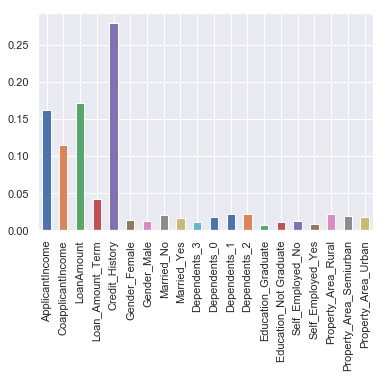

In [59]:
## lets see the feature importance
# credit history is worth variable 
importance=pd.Series(rf_str_model.feature_importances_,index=X.columns)
importance.plot(kind="bar")

In [60]:
# lets tune the hyperparametrs by grid search 
from sklearn.model_selection import GridSearchCV

In [61]:
parm={'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [62]:
# set a gridsearch
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),parm)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [64]:
# fitting of gridsearch
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [66]:
# stratified K FOld 
from sklearn.model_selection import StratifiedKFold
i=1
avg=0
str_kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in str_kf.split(X,y):
    print('\n{} of kfold {}'.format(i,str_kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    rf_str_model = RandomForestClassifier(random_state=1,max_depth=5,n_estimators=81)
    rf_str_model.fit(xtr, ytr)
    pred_test = rf_str_model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    avg=avg+score
    print('accuracy_score',score)
    i+=1
# average accuracy by staratified k fold.mean
rfGrid_avg_accuracy = avg/5
print('\n average accuracy for stritified kFold random forest classifier with gridsearch =',rfGrid_avg_accuracy)

pred=rf_str_model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164

 average accuracy for stritified kFold random forest classifier with gridsearch = 0.809439450026441


In [67]:
# XGboost 
import sklearn.ensemble as ske

In [68]:
# stratified K FOld 
from sklearn.model_selection import StratifiedKFold
i=1
avg=0
str_kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in str_kf.split(X,y):
    print('\n{} of kfold {}'.format(i,str_kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    XG_str_model = ske.GradientBoostingClassifier(random_state=1,max_depth=3,n_estimators=50)
    XG_str_model.fit(xtr, ytr)
    pred_test = XG_str_model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    avg=avg+score
    print('accuracy_score',score)
    i+=1
# average accuracy by staratified k fold.mean
XGB_avg_accuracy = avg/5
print('\n average accuracy for stritified kFold XGB classifier =',XGB_avg_accuracy)

pred=XG_str_model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.8032786885245902

 average accuracy for stritified kFold XGB classifier = 0.7865679534637756


## Putting all together


In [77]:
## lets have a summarize the accuracies and the models
result={"model":["Logistic","10F_CV_logistic","strtifiedKF_Logistic","Decision_tree","stratifiedKF_DecTree","RandomForest","RandomForest_Grid","XGB"],
         "accuracy":[log_score,CV_score,log_avg_accuracy,DT_score,DT_avg_accuracy,rf_avg_accuracy,rfGrid_avg_accuracy,XGB_avg_accuracy]            }

In [78]:
result_df=pd.DataFrame(result)
result_df

,model,accuracy
0,Logistic,0.804878
1,10F_CV_logistic,0.808589
2,strtifiedKF_Logistic,0.812692
3,Decision_tree,0.743902
4,stratifiedKF_DecTree,0.680883
5,RandomForest,0.750767
6,RandomForest_Grid,0.809439
7,XGB,0.786568


## Validation 

In [80]:
# lets check the logistic and random forest model performance on validation data
# 1.Logistic
x_validate =validate.drop('outcome',axis=1)
y_validate = validate.outcome

In [81]:
X_validate=pd.get_dummies(x_validate)

In [82]:
validation_prediction= str_model.predict(X_validate)

In [83]:
print('Accuracy of logistic regression classifier on validation data: {:.2f}'.format(str_model.score(X_validate, y_validate)))

Accuracy of logistic regression classifier on validation data: 0.94


In [84]:
validation_score=accuracy_score(validation_prediction,y_validate)
validation_score

0.9400544959128065

In [85]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_validate,validation_prediction)
confusion_matrix

array([[ 58,  19],
       [  3, 287]], dtype=int64)

In [87]:
validate["outcome"].value_counts()

1    290
0     77
Name: outcome, dtype: int64

In [88]:
submission=pd.DataFrame({"Loan_ID":validate_original["outcome"],"Loan_pred":validation_prediction})
submission.head()

,Loan_ID,Loan_pred
0,Y,1
1,Y,1
2,Y,1
3,Y,1
4,N,1


In [89]:
# lets convert 0 and 1 to Y/N
submission['Loan_pred'].replace(0, 'N',inplace=True)
submission['Loan_pred'].replace(1, 'Y',inplace=True)

In [90]:
submission['Loan_pred'].value_counts()

Y    306
N     61
Name: Loan_pred, dtype: int64

In [92]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook

file="LOan_status_val_pred.csv"
submission.to_csv(file,index=False)
print('Saved file: ' + file)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

PermissionError: [Errno 13] Permission denied: 'LOan_status_val_pred.csv'

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Sarvesh\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly 

# Looking Forward 
### problem of  **underfitting**
model is performing good on validation data bt poor on train data 

#### possible reasons:
-  less data providing for training
-  the model might be too simple 
-  the input features are not expressive enough to describe the target well. 

#### Performance can be improved by :
-  increasing model flexibility
-  some feature engineering 
-  increasing training data for building model
-  checking over outliers 

